<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Daten in Python einpflegen

col_1 = "Kelchblattlänge \
kurz \
mittel \
kurz \
lang \
mittel \
mittel \
lang \
lang \
mittel \
kurz \
mittel \
mittel"

col_2 = "Kelchblattbreite \
mittel \
breit \
mittel \
schmal \
mittel \
mittel \
mittel \
mittel \
mittel \
mittel \
mittel \
mittel"

col_3 = "Blütenblattlänge \
kurz \
kurz \
kurz \
mittel \
mittel \
mittel \
lang \
lang \
lang \
kurz \
mittel \
lang"

col_4 = "Blütenblattbreite \
schmal \
schmal \
schmal \
mittel \
mittel \
mittel \
breit \
breit \
breit \
schmal \
mittel \
breit"

col_5 = "id \
id_5 \
id_19 \
id_23 \
id_77 \
id_96 \
id_97 \
id_103 \
id_110 \
id_125 \
id_50 \
id_66 \
id_111"

col_6 = "label \
Iris-setosa \
Iris-setosa \
Iris-setosa \
Iris-versicolor \
Iris-versicolor \
Iris-versicolor \
Iris-virginica \
Iris-virginica \
Iris-virginica \
(Iris-setosa) \
(Iris-versicolor) \
(Iris-virginica)"

raw_data = [col_1, col_2, col_3, col_4, col_5, col_6]
raw_data = [x.split(" ") for x in raw_data]

In [4]:
# 1 a) Data Preperation

import numpy as np

data = np.array(raw_data)
data = np.delete(data, 4, 0)
data = data.transpose()

labels = data[0]
train = data[1:-3]
test = data[-3:]

for i, t in enumerate(test):
  test[i][4] = t[4].replace("(", "").replace(")", "")

### Funktion `data_count(attr, row, data)`
>*`attr`: Ist das Attribut nach dem gesucht wird* <br>
>*`row`: Ist die Spalte in der das Attribut zu finden ist* <br>
>*`data`: Ist der Datensatz als numpy Array, in dem zu suchen ist*

Diese Funktion gibt zurück **wie oft** das Attribut in dem Datensatz zu finden ist.

### Funktion `range_count(attrs, rows, attr, row, data, equal=True)`

>*`attrs`: Ist eine Liste von Attributen, nach denen gesucht werden soll* <br>
>*`rows`: Sind die Spalten als Liste, nach denen die entsprechenden Attribute des selben Index gesucht werden soll* <br>
>*`attr`: Ist das Ziellabel, worauf geprüft werden soll ob es bei Gleichheit von `attrs` vorhanden oder nicht vorhanden ist in Abhängigkeit von `equal`* <br>
>*`row`: gibt an in welcher Spalte sich unser Zielattribut in data befindet. Ist dieser Parameter None, wird nicht auf das Ziellabel geprüft.*<br>
>*`data`: Ist der Datensatz der durchsucht werden soll* <br>
>*`equal`*: `equal` gibt an, ob `attr` auf Gleichheit oder Ungleichheit bzgl. der Eingabeattribute geprüft werden soll

Diese Funktion durchsucht den Datensatz und prüft wie oft eine Liste von Attributen mit dem Ziellabel gefunden wird. Je nach dem Attribut equal, wird das Ziellabel in Bezug auf die Attribut Liste auf Gleichheit oder Ungleichheit geprüpft. Wird `row` auf `None` gesetzt, wird nur auf die Attribute gesucht.

In [15]:
# 1 a) Helferfunktion zum Zählen der Daten für Einträge

def data_count(attr, row, data):
  count = 0
  for dat in data:
    if dat[row] == attr:
      count += 1
  return count

def range_count(attrs, rows, attr, row, data, equal=True):
  count = 0
  for dat in data:
    found = True
    
    # i ist der Index in der Attribut Spalte
    # r ist der Index aus der Liste von Integern, Spalte in dat
    for i, r in enumerate(rows):
      if dat[r] != attrs[i]:
        found = False
        break
    
    # Wenn eine row angegeben, dann wird mit dem Ziellabel verglichen
    if row:
      if found:
        if equal and dat[row] != attr:
          found = False
          continue
        elif not equal and dat[row] == attr:
          found = False
          continue
    if found:
      count += 1

  return count

In [ ]:
# Attribute als Tabelle anzeigen

for i in range(len(labels)):
  print(f"{i:<20}", end="")
print()
for item in labels:
  print(f"{item:<20}", end="")

>0 | 1 | 2 | 3 | 4 
>--- | --- | --- | --- | ---                    
>Kelchblattlänge | Kelchblattbreite | Blütenblattlänge | Blütenblattbreite | Label  

In [17]:
##### p_setosa

p_setosa_label = data_count("Iris-setosa", 4, train) / len(train)
p_setosa_attr  = range_count(test[0][:3], range(3), test[0][4], 4, train) / len(train)
p_setosa_n_attr = range_count(test[0][:3], range(3), test[0][4], 4, train, False) / len(train)
p_setosa_only_attr = range_count(test[0][:3], range(3), None, None, train)

# Wahrscheinlichkeit Setosa und Attribute
P_s_a = p_setosa_attr/p_setosa_label
P_s_na = p_setosa_n_attr/p_setosa_label

P_is_Setosa = P_s_a*p_setosa_label/ p_setosa_only_attr

print(f"Setosa: {P_is_Setosa}")

##### p_versi
p_versi_label = data_count("Iris-versicolor", 4, train) / len(train)
p_versi_attr = range_count(test[1][:3], range(3), test[1][4], 4, train) / len(train)
p_versi_n_attr = range_count(test[1][:3], range(3), test[1][4], 4, train, False) / len(train)
p_versi_only_attr = range_count(test[1][:3], range(3), None, None, train)

# Wahrscheinlichkeit Versicolor und Attribute
P_ve_a = p_versi_attr/p_versi_label
P_ve_na = p_versi_n_attr/p_versi_label

P_is_Versicolor = P_ve_a*p_versi_label/ p_versi_only_attr

print(f"Versicolor: {P_is_Versicolor}")

##### p_virg 
p_virg_label = data_count("Iris-virginica", 4, train) / len(train)
p_virg_attr = range_count(test[2][:3], range(3), test[2][4], 4, train) / len(train)
p_virg_n_attr = range_count(test[2][:3], range(3), test[2][4], 4, train, False) / len(train)
p_virg_only_attr = range_count(test[2][:3], range(3), None, None, train)

# Wahrscheinlichkeit Virginica und Attribute
P_vi_a = p_virg_attr/p_virg_label
P_vi_na = p_virg_n_attr/p_virg_label

P_is_Virginica = P_vi_a*p_virg_label/ p_virg_only_attr

print(f"Virginica: {P_is_Virginica}")

Setosa: 0.1111111111111111
Versicolor: 0.1111111111111111
Virginica: 0.1111111111111111


## Vorbereitung
Die bisherigen Dataframes werden zusammengeführt. <br>
Wir teilen erst den Datensatz nach *Attributen* `X` und nach *Labeln*  `Y`

In [8]:
import pandas as pd

df_prepare = np.vstack((train, test))

df = pd.DataFrame(df_prepare, columns=labels)

df

,Kelchblattlänge,Kelchblattbreite,Blütenblattlänge,Blütenblattbreite,label
0,kurz,mittel,kurz,schmal,Iris-setosa
1,mittel,breit,kurz,schmal,Iris-setosa
2,kurz,mittel,kurz,schmal,Iris-setosa
3,lang,schmal,mittel,mittel,Iris-versicolor
4,mittel,mittel,mittel,mittel,Iris-versicolor
5,mittel,mittel,mittel,mittel,Iris-versicolor
6,lang,mittel,lang,breit,Iris-virginica
7,lang,mittel,lang,breit,Iris-virginica
8,mittel,mittel,lang,breit,Iris-virginica
9,kurz,mittel,kurz,schmal,Iris-setosa


## Vorbereitung

Mit df.loc wird das Dataframe nach `[Reihen, Spalten]` gefiltert. Mit `[von:bis:step]` kann Reihe und Spalte konfiguriert werden. Bei `.loc` werden die Namen der Spalten bzw. Zeilen (wenn als Zeichenkette vorhanden) angegeben. Das Attribut `.value` gibt uns die konkreten Werte zurück.

## Encoding von Werten mit Zeichenketten

Danach wird mit dem `LabelEncoder` jedes Label in einen Wert überführt. Der Encoder speichert die Abbildung vom String in den numerischen Wert, sodass das am Ende die Rückkonvertierung wieder möglich ist. Mit `LabelEncoder.fit_transform(x)` können die Werte kodiert werden. Dazu muss das übergebene Label eine konkrete Form haben. Derzeit hat `x` folgende Form:

```
[['kurz' 'mittel' 'kurz' 'schmal'],
 ['mittel' 'breit' 'kurz' 'schmal'],
 ['kurz' 'mittel' 'kurz' 'schmal'],
 [.....],...]`
```

 Es muss in ein ein-dimensionales Array überführt werden, welches wie folgt aussieht:

```
 ['kurz',
  'mittel', 
  'kurz',
  'schmal',
  ...]
```

Mit dem Attribut `.shape` eines Numpy Arrays können wir uns die gegenwärtige Shape des Arrays ausgeben lassen und speichern. Mit `.reshape(-1)` können wir das komplette Array in ein ein-dimensionales Array umformen, und mit `.reshape(gespeicherte_shape)` wieder zurückformen. Wichtig dabei ist, dass für `.reshape()` die neue Shape eindeutig aufgeht. Für ein Array mit 12 Elementen geht eine Shape mit `(3,4)`, aber nicht mit `(3,5)`. <br> *(3*\**4 = 12, 3*\**5=15)*

Für `y` kann man einfach mit `.reshape(-1, 1)` wieder zurücktransformieren. `-1` sagt *nimm alle Elemente* und `1` sagt *und packe diese in ein-dimensionale Arrays* 

In [30]:
from sklearn.preprocessing import LabelEncoder

x = df.loc[:, :"Blütenblattbreite"].values
y = df.loc[:, "label":].values

shape = x.shape
x_encoder = LabelEncoder()
x = x_encoder.fit_transform(x.reshape(-1))

x = x.reshape(shape)

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y.reshape(-1))
y = y.reshape(-1, 1)

In [10]:
# In Trainings- und Testset splitten
from sklearn.model_selection import train_test_split

x_train = x[:8]
x_test = x[9:] 

y_train = y[:8]
y_test = y[9:]

# Methodik
## 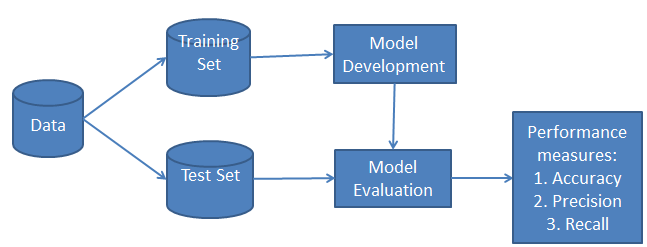 <br>
Bildquelle: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

## Formel
\begin{equation}
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
\end{equation}


## Bayes'sche Wahrscheinlichkeit

Mit der Klasse GaussianNB kann der mit der Bayesschen Wahrscheinlichkeit ein Model trainiert werden. Wieder wird mit der Funktion `.fit(x_train, y_train)` das Model trainiert und mit `.fit(x_test)` wird aufgrund des Trainings eine Vorherhsage gemacht.

Die Klasse GaussianNB arbeitet unter der Haube mit derselben Formel. Allerdings über einige Umformungsschritte setzt dieser Algorithmus folgende Formel um:

\begin{equation}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
\end{equation}

Quelle: https://scikit-learn.org/stable/modules/naive_bayes.html

## Encoded zu Zeichenketten

Mit dem Encoder wurden die Zeichenketten in numerische Werte überführt. Dieses Objekt ist in der Lage mit der Funktion `.inverse_transform(y)` die Werte wieder in die Zeichenketten zurück zu tranformieren. So ist es dann möglich die Prediction als Zeichenkette sich anzeigen zu lassen.

In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
GaussianNB(priors=None)
y_pred = clf.predict(x_test)

list(y_encoder.inverse_transform(y_pred))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Metrics

## Accuracy Score

Der Accuracy Score beschreibt wie genau eine Klassifizierung durchgeführt wurde. Er wird auf Klassifizierungsdatensätzen angewandt.

## Precission Score

Der Precision Score wird bei binären Labels verwendet. Das bedeutet, ein Label kann entweder zutreffend oder nicht zutreffen (positive/negative) sein. Hier wird die Genauigkeit angegeben ein negatives Ergebnis nicht positiv zu kennzeichnen. Sprich die Rate wie viele negative Ergebnisse richtig erkannt werden

## Recall Score

Ist equivalent zum _Precission Score_ mit dem Unterschied, dass hier die Rate der richtigen positiven Ergebnisse dargestellt wird.

In [42]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}")

Accuracy: 1.0


# Iris Flower Datensatz

`sklearn` verfügt über bereits mitgelieferte Datensätze die über `sklearn.datasets` importiert werden können. Der Iris Flower Datensatz beinhaltet 50 Samples für jede der drei beinhalteten Blumen (Iris setosa, Iris virginica, Iris versicolor).

Hier ist ein Beispiel aufgeführt wie man mit dem bayes'schen Verfahren ein Model erzeugen und darüber eine Vorhersage durchführen kann.

Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4
